# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())
display(data.loc[:,['Fresh','Milk','Frozen']])

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

Fresh   Milk  Frozen
0    12669   9656     214
1     7057   9810    1762
2     6353   8808    2405
3    13265   1196    6404
4    22615   5410    3915
5     9413   8259     666
6    12126   3199     480
7     7579   4956    1669
8     5963   3648     425
9     6006  11093    1159
10    3366   5403    4400
11   13146   1124    1420
12   31714  12319     287
13   21217   6208    3095
14   24653   9465     294
15   10253   1114     397
16    1020   8816     134
17    5876   6157     839
18   18601   6327    2205
19    7780   2495     669
20   17546   4519    1066
21    5567    871    3383
22   31276   1917    9408
23   26373  36423    5154
24   22647   9776    2915
25   16165   4230     201
26    9898    961    3151
27   14276    803     485
28    4113  20484    1158
29   43088   2100    1200
..     ...    ...     ...
410   6633   2096    1389
411   2126   3289    1535
412     97   3605      98
413   4983   4859   17866
414   5969   1990    5679
415   7842   6046    1691
416   4389  10940     848
417   5065   5499     364
418    660   8494     133
419   8861   3783     633
420   4456   5266      25
421  17063   4847    1031
422  26400   1377     830
423  17565   3686    1059
424  16980   2884     874
425  11243   2408   15348
426  13134   9347    3141
427  31012  16687   15082
428   3047   5970    2198
429   8607   1750      47
430   3097   4230     575
431   8533   5506   13486
432  21117   1162     269
433   1982   3218    1541
434  16731   3922     688
435  29703  12051   13135
436  39228   1431    4510
437  14531  15488     437
438  10290   1981    1038
439   2787   1698      65

[440 rows x 3 columns]

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594   7779    12144    3252              8035          3029
1   3067  13240    23127    3941              9959           731
2   4446    906     1238    3576               153          1014

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  -406.0  1983.0   4193.0   180.0            5154.0        1504.0
1 -8933.0  7444.0  15176.0   869.0            7078.0        -794.0
2 -7554.0 -4890.0  -6713.0   504.0           -2728.0        -511.0

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  3090.0  4152.0   7388.0  1726.0            7219.0        2063.0
1 -5437.0  9613.0  18371.0  2415.0            9143.0        -235.0
2 -4058.0 -2721.0  -3518.0  2050.0            -663.0          48.0

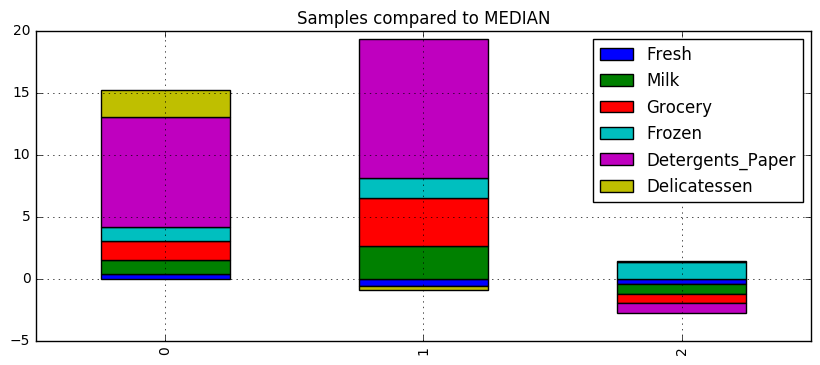

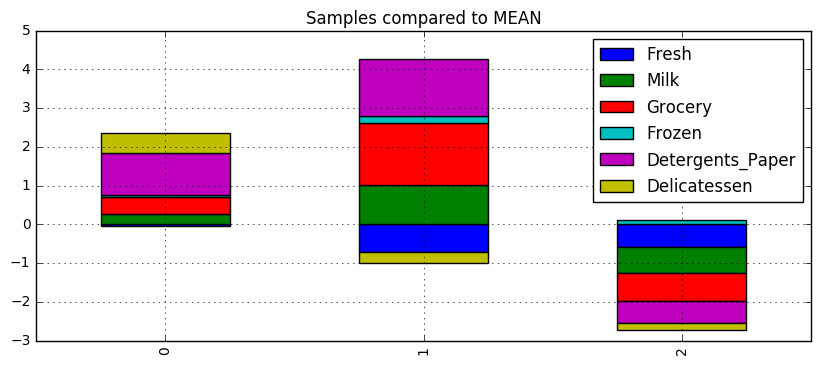

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100, 200, 400]


# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
#display(samples.drop(['Grocery','Frozen','Detergents_Paper'],axis=1))
display(samples)
display(samples - data.mean().round())
display(samples - data.median().round())
((samples-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Samples compared to MEDIAN', grid=True,stacked=True)
((samples-data.mean()) / data.std()).plot.bar(figsize=(10,4), title='Samples compared to MEAN', grid=True, stacked=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
the first customer (sample #0) median and mean graph illustrates a similar spend on frozen, grocery and milk as most customers while spend on Delicatessen seems to be more, so it could represent a small retail store. when compared to the second customer, the spend proportion of products seems similar except that the second customer seems to buy these in higher quantities. so the second customer seems to be a chain store. the third customer seems to buy more frozen products and less of the other products compared to most customers. hence it appears to represent a restaurant type customer.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Delicatessen'], axis=1)
#new_data = data.drop(['Detergents_Paper'], axis=1)
#new_data = samples.drop(['Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], axis=1)


# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size=0.25, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(new_data, samples['Detergents_Paper'], test_size=0.25, random_state=42)



# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#display(y_pred)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
display(score)

/Users/sudhirmodali/.virtualenvs/quant/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-2.254711537203931

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
the attempt was to predict number of customers buying "Delicatessen" based on the information we have for categories "Fresh" and "Milk". the reported score was -2.254711537203931. this is negative score which implies that the model failed to predict values of "Delicatessen". Based on the Decision Tree Regressor model, this feature fails to determine whether customers purchasing some amount of "Fresh" and "Milk" will necessarily purchase some proportional amount of "Delicatessen".  hence we cannot identify customers under category Fresh and/or Milk will buy any Delicatessen. since Delicatessen feature cannot be predicted, it is an important feature in the dataset to identify customer spending habits since it represents a specialty customer category.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

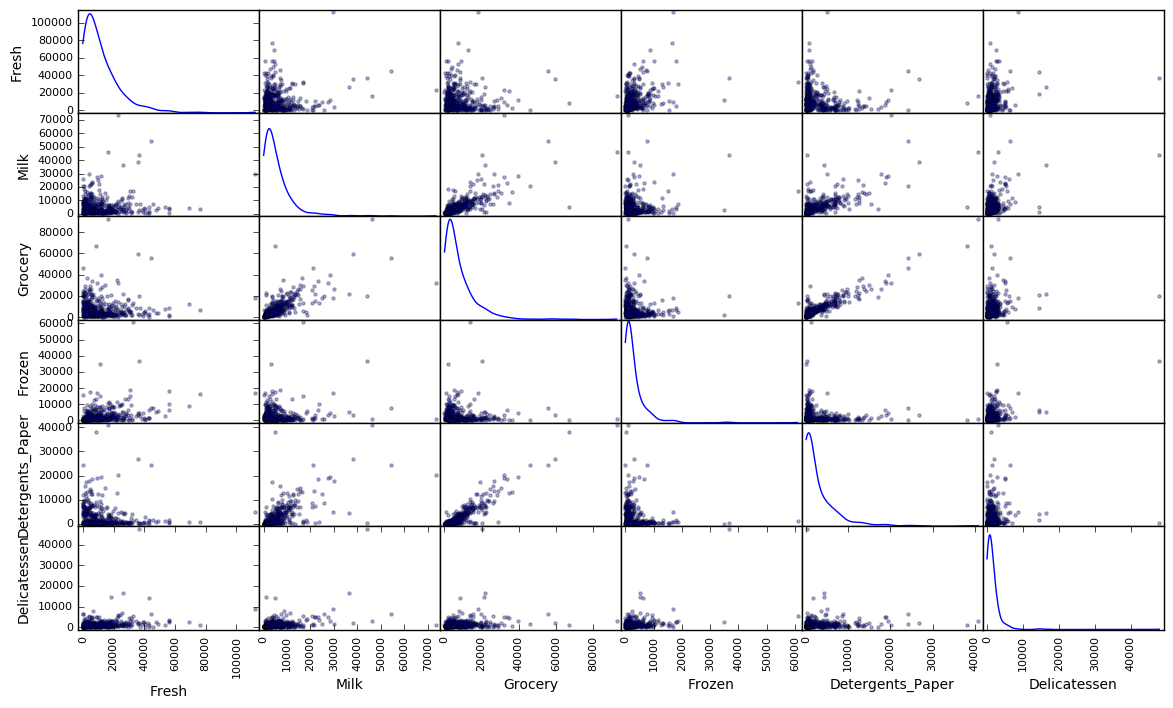

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
features which display some amount of correlation include Grocery, Milk, Detergents_Paper. this confirms some of the intuitions. however for Delicatessen, which is the feature attempted for prediction there is no such correlation. this is also confirmed by the scatter_matrix plot. for the Delicatessen plots, it almost appears like a vertical/horizontal line which demonstrates independence from the other features. this is also confirmed by the negative score via the Decision tree regressor. for most of the features, the data distribution seems to be lognormal i.e mean and median have a large skew.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

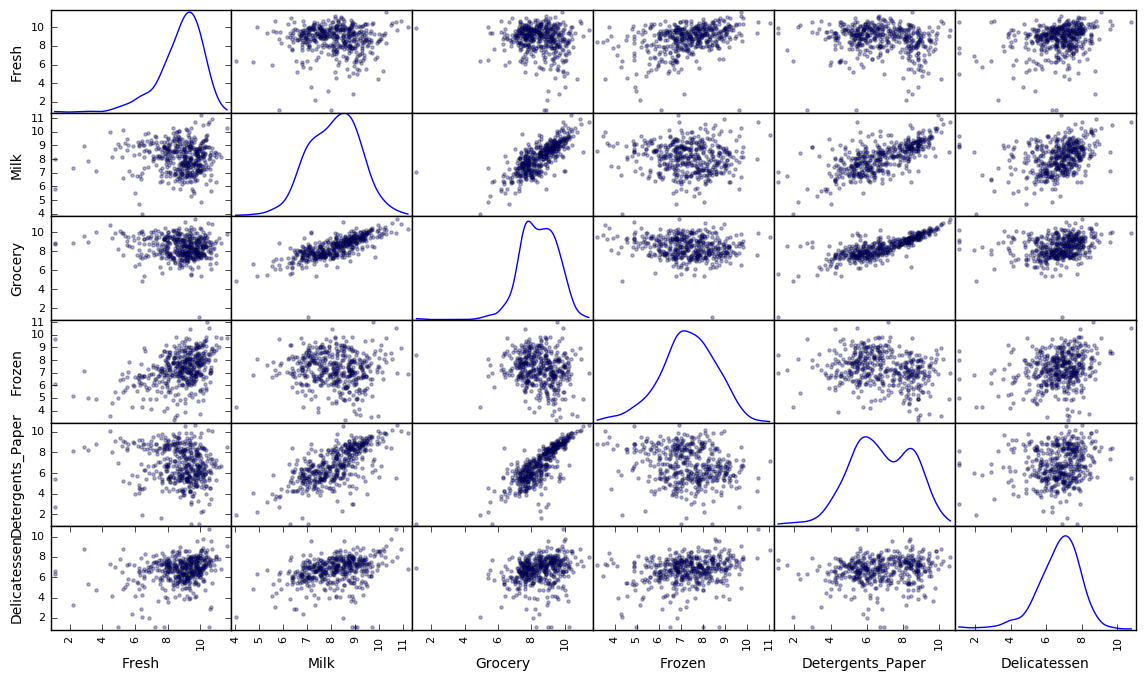

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
#pd.scatter_matrix(log_samples.drop(['Grocery','Frozen','Detergents_Paper'],axis=1), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
#display(log_samples.drop(['Grocery','Frozen','Detergents_Paper'],axis=1))
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.358243  8.959183   9.404590  8.087025          8.991562      8.015988
1  8.028455  9.490998  10.048756  8.279190          9.206232      6.594413
2  8.399760  6.809039   7.121252  8.182000          5.030438      6.921658

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
from collections import Counter
cnt = Counter()
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier[feature])
    cnt.update(outlier.index)

display(cnt.most_common())
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


65     4.442651
66     2.197225
81     5.389072
95     1.098612
96     3.135494
128    4.941642
171    5.298317
193    5.192957
218    2.890372
304    5.081404
305    5.493061
338    1.098612
353    4.762174
355    5.247024
357    3.610918
412    4.574711
Name: Fresh, dtype: float64

Data points considered outliers for the feature 'Milk':


86     11.205013
98      4.718499
154     4.007333
356     4.897840
Name: Milk, dtype: float64

Data points considered outliers for the feature 'Grocery':


75     1.098612
154    4.919981
Name: Grocery, dtype: float64

Data points considered outliers for the feature 'Frozen':


38      3.496508
57      3.637586
65      3.583519
145     3.737670
175     3.951244
264     4.110874
325    11.016479
420     3.218876
429     3.850148
439     4.174387
Name: Frozen, dtype: float64

Data points considered outliers for the feature 'Detergents_Paper':


75     1.098612
161    1.098612
Name: Detergents_Paper, dtype: float64

Data points considered outliers for the feature 'Delicatessen':


66      3.295837
109     1.098612
128     1.098612
137     3.583519
142     1.098612
154     2.079442
183    10.777768
184     2.397895
187     1.098612
203     2.890372
233     1.945910
285     2.890372
289     3.091042
343     3.610918
Name: Delicatessen, dtype: float64

[(154, 3),
 (128, 2),
 (65, 2),
 (66, 2),
 (75, 2),
 (193, 1),
 (264, 1),
 (137, 1),
 (142, 1),
 (145, 1),
 (412, 1),
 (285, 1),
 (161, 1),
 (420, 1),
 (38, 1),
 (171, 1),
 (429, 1),
 (175, 1),
 (304, 1),
 (305, 1),
 (439, 1),
 (184, 1),
 (57, 1),
 (187, 1),
 (203, 1),
 (325, 1),
 (289, 1),
 (81, 1),
 (338, 1),
 (86, 1),
 (343, 1),
 (218, 1),
 (95, 1),
 (96, 1),
 (353, 1),
 (98, 1),
 (355, 1),
 (356, 1),
 (357, 1),
 (233, 1),
 (109, 1),
 (183, 1)]

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
yes there are data points that can be considered outliers based on the Turkey's method used. while outliers may not be essential for training a model, they still provide some useful information that might help understand some aspects of the customer buying trends such as residential customers, mom-pop shops or other specialty shops that might need a range of products for daily use these category of customers are typically low volume but typically high in number. hence outliers should not be removed from the dataset. Samples 154,128,65,66 and 75 are outliers that belong to multiple categories

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

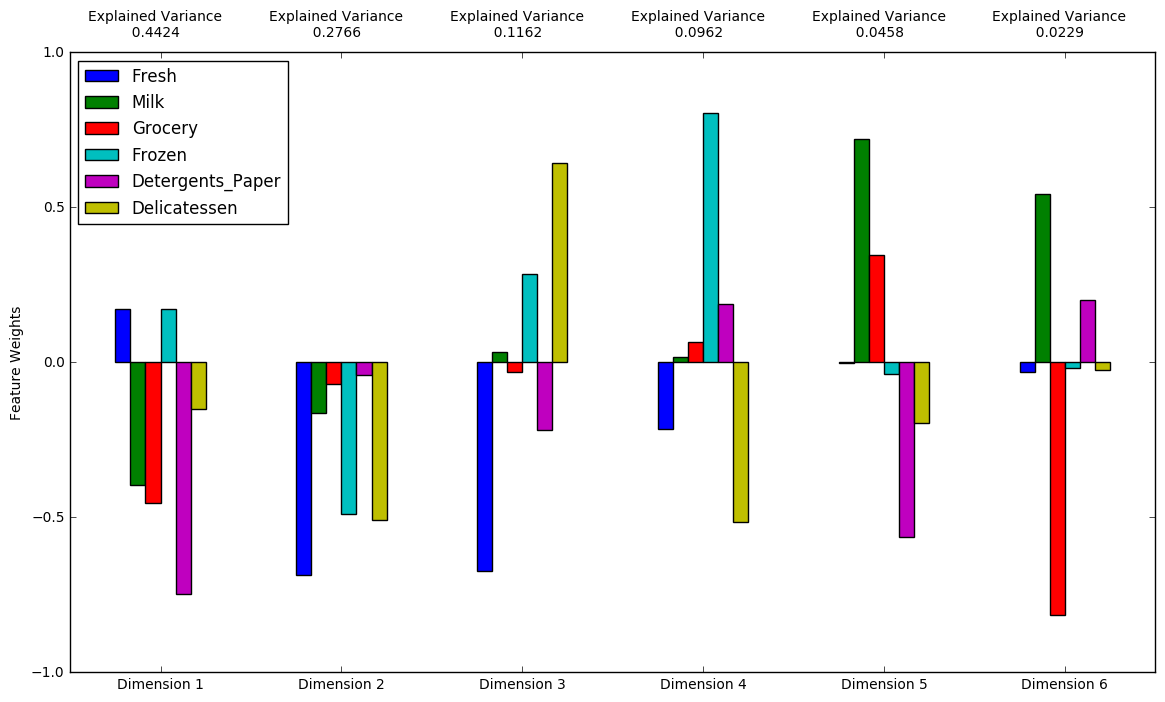

In [10]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)
#display(pca.get_covariance)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
variance in data accounted by the first 2 components = 0.4424 + 0.2766 = 0.7190 
variance in data accounted by the first four principal components = 0.9314
Each dimension seems to represent the spending pattern in the categories. the graph provides insights into the spending habits of target customers compared to others. 
Dimension 1 : Majority customers buying Fresh and Frozen items are least likely to buy Detergents_Paper, Grocery, Milk  or less likely to buy Delicatessen at this store. Detergents_Paper, Grocery and Milk have large positive weights compared to Fresh and Frozen items which may represent households or grocery shops. this represents the first principal component accounting for nearly 44% of the customer spend.
Dimension 2: The second principal component comprises of large positive weights for Fresh, Frozen and Delicatessen followed by Milk. The component also comprises low positive weights for Detergents_Paper and Grocery. This suggests large store selling finished or ready-to-eat products. this accounts for nearly 27% of customer spend.
Dimension 3: The third principal component comprises of large positive weights for Delicatessen and Fresh followed by Frozen and Detergents_Paper along with a low positive weight for Milk and Grocery. This suggests this category is a  restaurant or a catering service. This represents 11% of the customer spend.
Dimension 4: the fourth principal component comprises of large positive weights for Frozen, Delicatessen, Fresh and Detergents_Paper. This component has low positives on Milk and Grocery. hence this could represent steak house or a sushi restaurant. this accounts for  nearly 9% of the customer spend.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.3702      -1.7971       0.1871       0.3020      -0.5955   
1      -3.0182      -0.3952       0.1711       1.5640       0.1637   
2       2.4819       0.0446       1.0212       0.2059      -0.4992   

   Dimension 6  
0       0.0546  
1      -0.0694  
2      -0.0051

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.3702      -1.7971
1      -3.0182      -0.3952
2       2.4819       0.0446

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

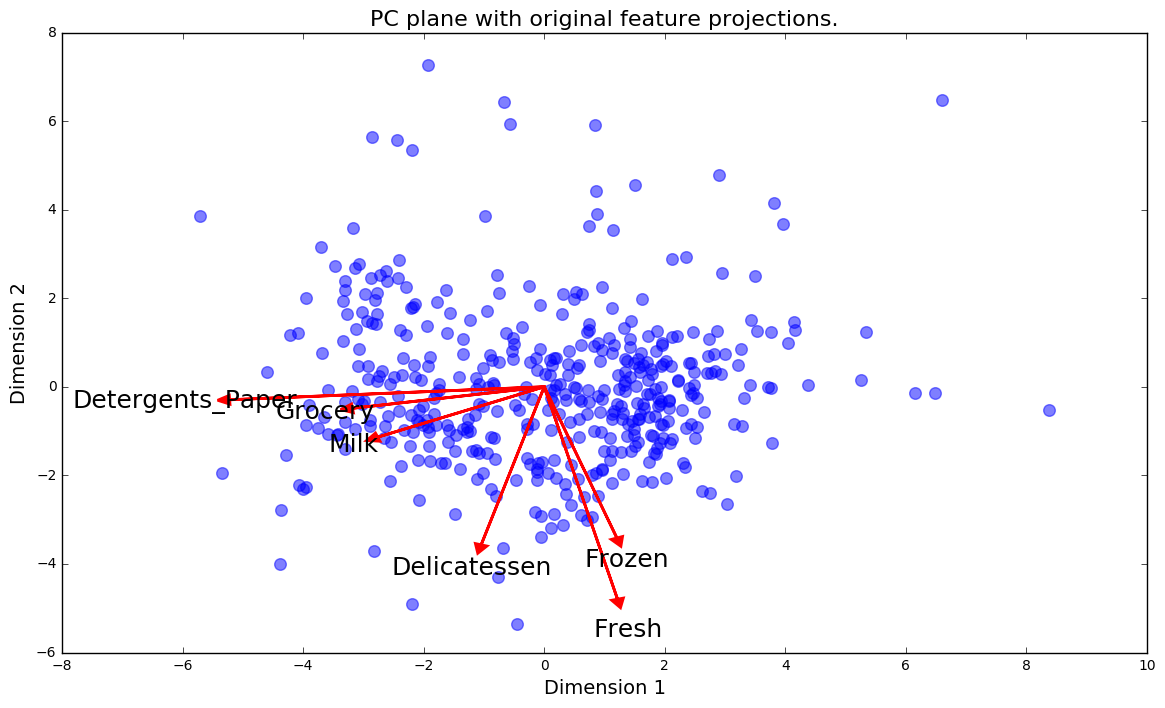

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-means clustering provides a simple method to categorize un-labelled data into a pre-determined number of categories or clusters. in the current example of wholesale customer data, if the categories of customers is preset to a known set, then k-means could solve the problem of determining which data point belongs to or has affinity to a particular customer category. 
Gaussian mixture model provides a probablistic method of assiging a data point to a group of clusters/categories. Mixture models would let you determine these categories, without associating each sample with a cluster. These categories are defined by distributions with unknown parameters. For learning these parameters Expectation-Maximisation is to be used. Also there are weights for each of these distributions which are probabilities and hence sum to 1. With each sample there is a corresponding latent random variable each distributed according to a K-dimensional categorical distributions, K is the number of categories.
since the variance in the customer data is clearly explained by the top 4 dimensions (=0.93), it seems like a good idea to stick to k-means clustering. even if we included all 6 dimensions that explains the complete variance of the available customer data, intution is that k-means would provide accurate results faster than GMM.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
clusterer = None


# TODO: Predict the cluster for each data point
preds = None


# TODO: Find the cluster centers
centers = None


# TODO: Predict the cluster for each transformed sample data point
sample_preds = None


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = None

clusters = [2,3,4,5,6,10,100,200,300,400]
clusters = [2]
score = {}
for clu in clusters:
    clusterer = KMeans(n_clusters = clu).fit(reduced_data)
    #clusterer = GaussianMixture(n_components = clu).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    score[clu] = silhouette_score(reduced_data,preds)
display(score)
    

{2: 0.41916608320292309}

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Clusters : Score
 2: 0.41916608320292309,
 3: 0.39235868995830997,
 4: 0.33020829090662096,
 5: 0.34691291498923593,
 6: 0.36011577569015363,
 10: 0.35002330409385107,
 100: 0.37627595452424006,
 200: 0.34522820885834821,
 300: 0.28104642365539895,
 400: 0.11090859925400572
 
 Cluster = 2 has the best silhouette score of approximately 0.42 within a range of -1 to 1.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

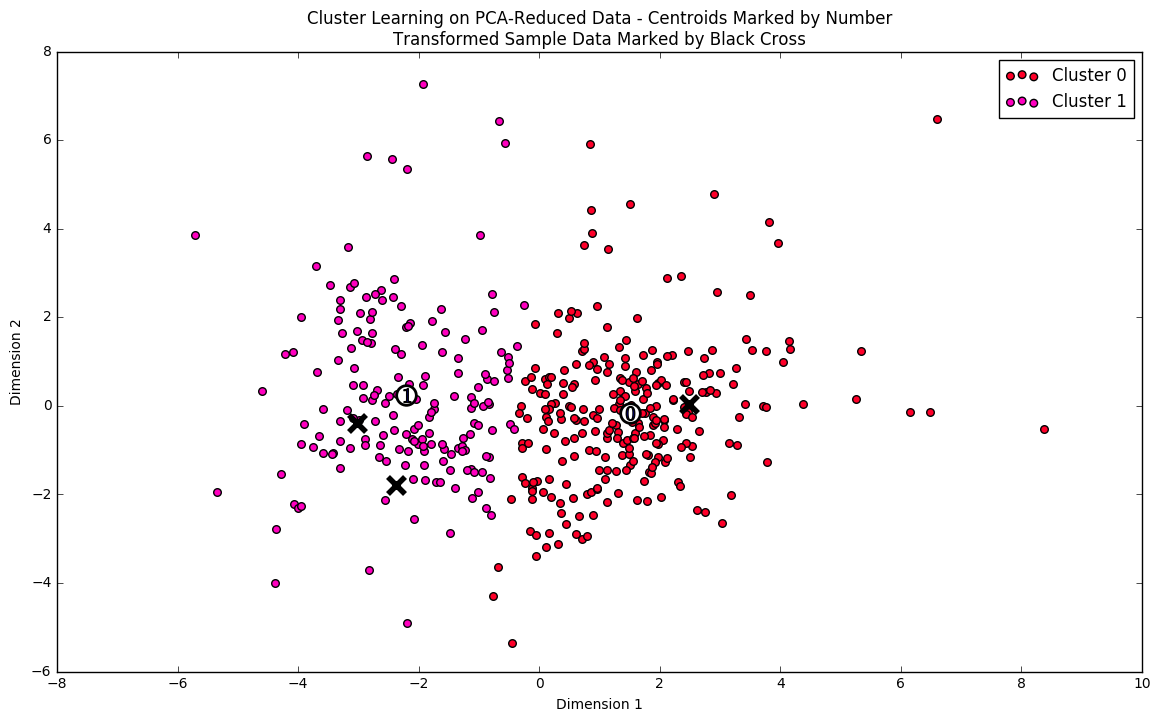

In [16]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.mean())
display(data.median())

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8994.0  1909.0   2366.0  2081.0             290.0         681.0
Segment 1  3570.0  7749.0  12463.0   900.0            4567.0         966.0

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
the true_centers above represents the average spend on products for each Segment.Segment0 is characteristed by higher spend on Fresh, Milk, Grocery and Frozen items. similarly Segemnt 1 is characterised by higher spend on Fresh, Milk, Grocery and Detergents_paper. Clearly, the 2 segments can be differentiated in the spend on Frozen and Detergents_paper.
Comparing this to the data samples used, the first 2 customers clearly have a high spend on Detergents_paper while the third customer has a high spend on Frozen items. as such the first 2 customers of the sample data are represented by Segment 1 while the third customer is represented by Segment 0 characterisitcs.. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [18]:
# Display the predictions
display(samples)
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594   7779    12144    3252              8035          3029
1   3067  13240    23127    3941              9959           731
2   4446    906     1238    3576               153          1014

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
Based on response to question 8:
Segment 0 captures the category that spends more on Fresh, Milk, Grocery, Frozen
Segment 1 captures the category that spends more on Fresh, Milk, Grocery, Detergents_Paper

Sample point 0 has a high spend on Fresh, Grocery, Detergents_Paper and Milk which represents Segment 1
Sample point 1 has high spend on Fresh, Milk, Grocery, Frozen, Detergents_Paper which represents both Segment 0 and 1
Sample point 2 has high spend on Fresh, Grocery, Frozen, Delicatessen, Milk which is closer to Segment 0

based on the above analysis the predicted could be considered accurate.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Experiment design: assuming the ordering process is executed via a webpage, the default option for service delivery should be changed from 5 to 3 days per week. another vairation could be to leave the default at 5 days/week, but notify the customers about availability of delivery service of 3 days/week.
Sample size: each cluster should be divided into control and variation treatment groups. the control group should be 50% and the variation group should be 50%. the first experimental page should be presented to the variation group in  cluster 0 and the second experimental page should be presented to the variation group in cluster 1.
Period of experiment: typically for getting meaningful feedback from the customers, the experiment should run for atleast enough cycles of deliveries to confirm that there are no false positives (choosing default by mistake or some other factors). a safe period could be 5 weeks.
feedback analysis: for responses from customers, an analysis of how many customers from each cluster actually chose 3 days/week  vs 5 days/week delivery service will provide an idea of the conversion rate. if the conversion rate is equal to or higher than the customers opting default (5 days/week) service, the company is free to change the delivery service for the entire cluster.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
the problem to solve here is to determine the appropriate weekly delivery service. this requires determining the weekly spend on each product category and using a classifer (such as SVC) on the estimated product spending and customer segment data to generate a label (target variable) that accounts for estimate_weekly_stock_inventory. this will determine if the target customer will benefit or be impacted by a change in the delivery times. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

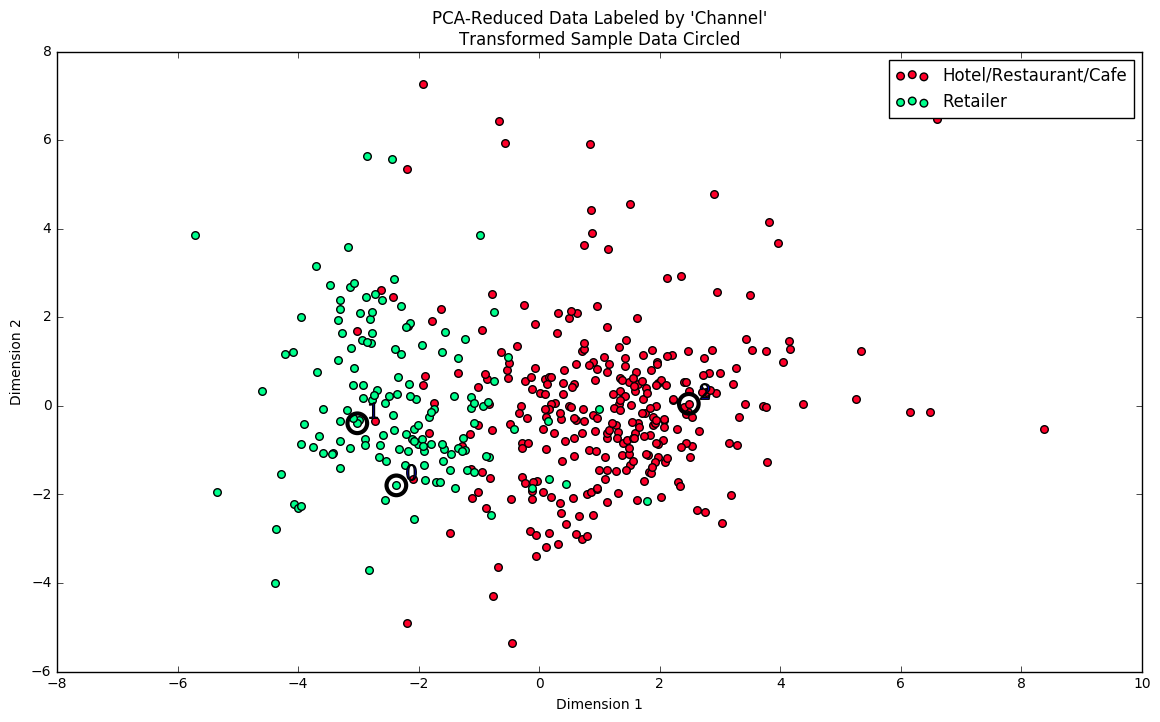

In [19]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
the K-Means cluster chosen here used 2 clusters for the underlying distribution. there are a few outliers but they do not skew the underlying distribution in an impactful way. clearly there are no customer segments that can be classified as belonging to Retailers of Hotels/Restaurants/Cafe based on their product spending, since none of the customers fall on any of the axes. there certainly is consistency with the prior intuition and the classification used.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.